Correlation coefficient

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("VLagun_Plank_Years4.csv")
print(data)

     Cyanobacteria  Chlorophyceae  Euglenophyceae  Diatomophyceae  Flagellata  \
0             2.35           3.08            0.92            0.23        0.00   
1             6.39           2.87            0.49            0.01        0.00   
2            10.80           1.64            0.29            0.23        0.00   
3             4.91           2.84            0.09            2.00        0.00   
4             6.62           2.03            0.00            1.39        1.65   
..             ...            ...             ...             ...         ...   
115           5.67           2.31            0.48            1.48        0.23   
116           5.85           1.53            0.12            1.24        0.19   
117           4.11           0.75            0.36            1.49        0.07   
118           4.94           0.87            0.08            1.52        0.26   
119           6.38           2.29            0.39            2.47        0.74   

     Dinoflagellata  Crypto

In [119]:
data = data.drop(["Cyanobacteria"],axis=1)
data = data.drop(["Diatomophyceae"],axis=1)
data = data.drop(["Flagellata"],axis=1)

Text(0.5, 1.0, '1.0')

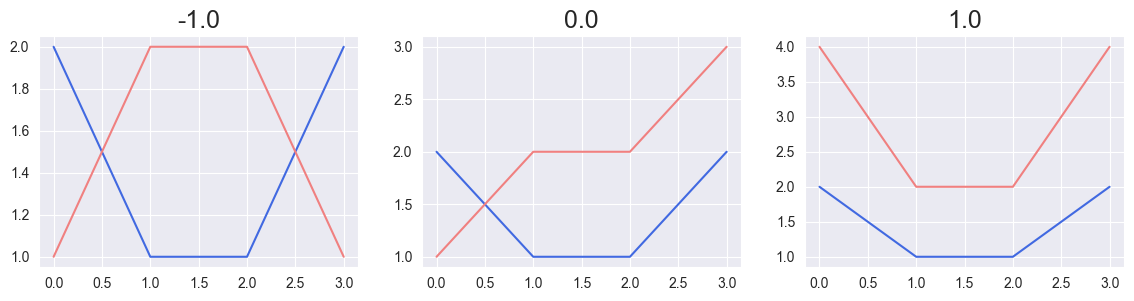

In [120]:
import numpy as np

plt.figure(figsize=(14, 3))

line1 = np.array([2, 1, 1, 2])
line2 = np.array([1, 2, 2, 1])

plt.subplot(131)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(np.corrcoef(line1, line2)[1, 0], fontsize=18)

line1 = np.array([2, 1, 1, 2])
line2 = np.array([1, 2, 2, 3])

plt.subplot(132)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(round(np.corrcoef(line1, line2)[1, 0], 2), fontsize=18)

line1 = np.array([2, 1, 1, 2])
line2 = 2 * line1

plt.subplot(133)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(np.corrcoef(line2, 2 * line2)[1, 0], fontsize=18)

<Axes: >

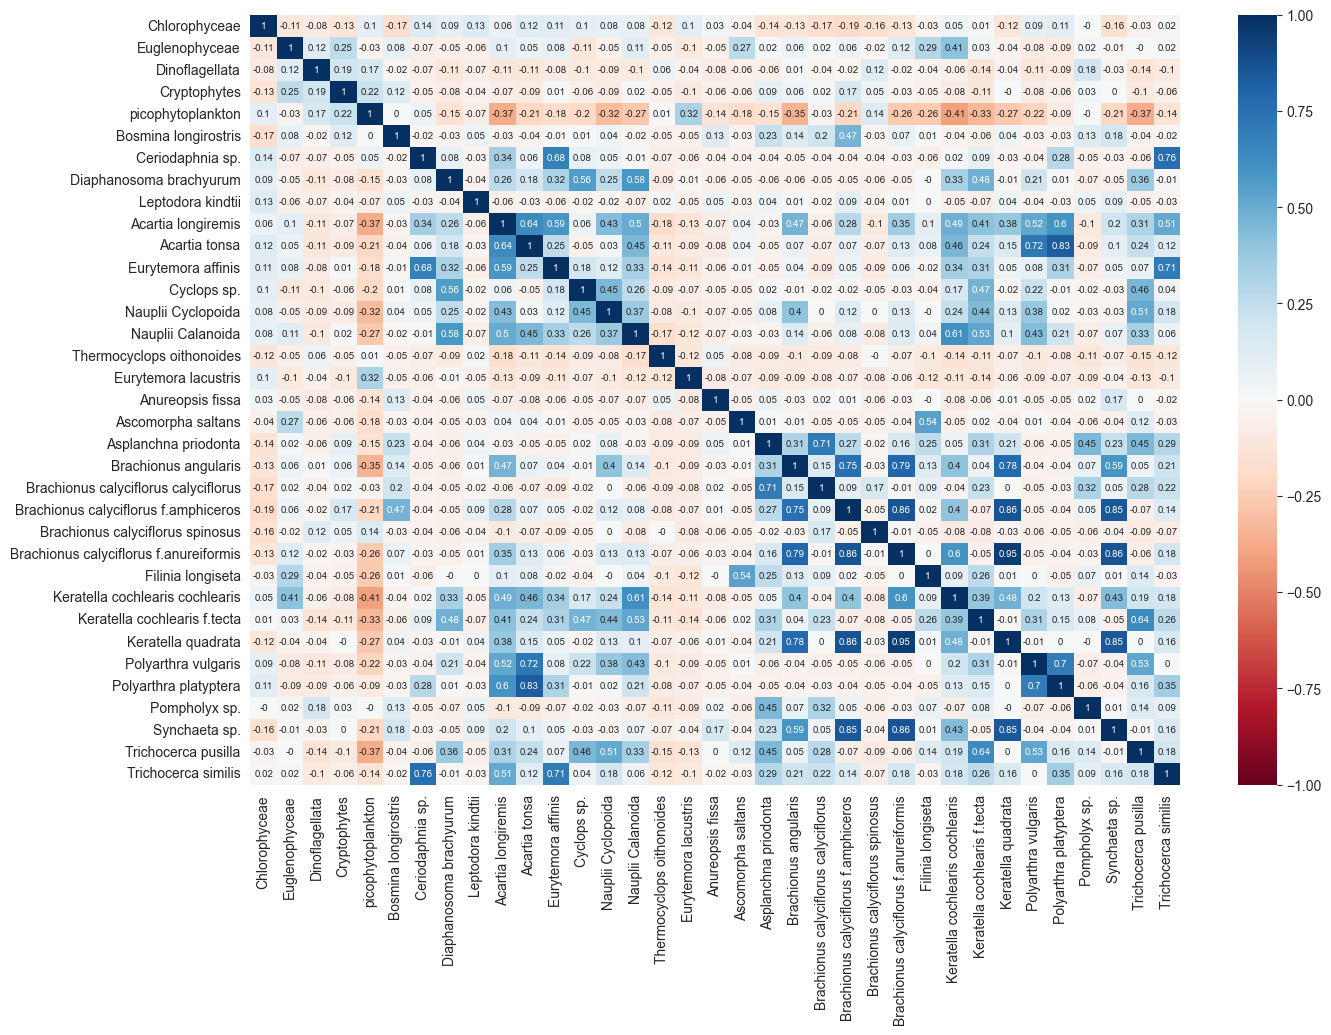

In [121]:
plt.figure(figsize=(15, 10))
correlations = data.corr()
sns.heatmap(round(correlations, 2), cmap='RdBu', annot=True,
            annot_kws={"size": 7}, vmin=-1, vmax=1)

Hierarchical Clustering

<Axes: >

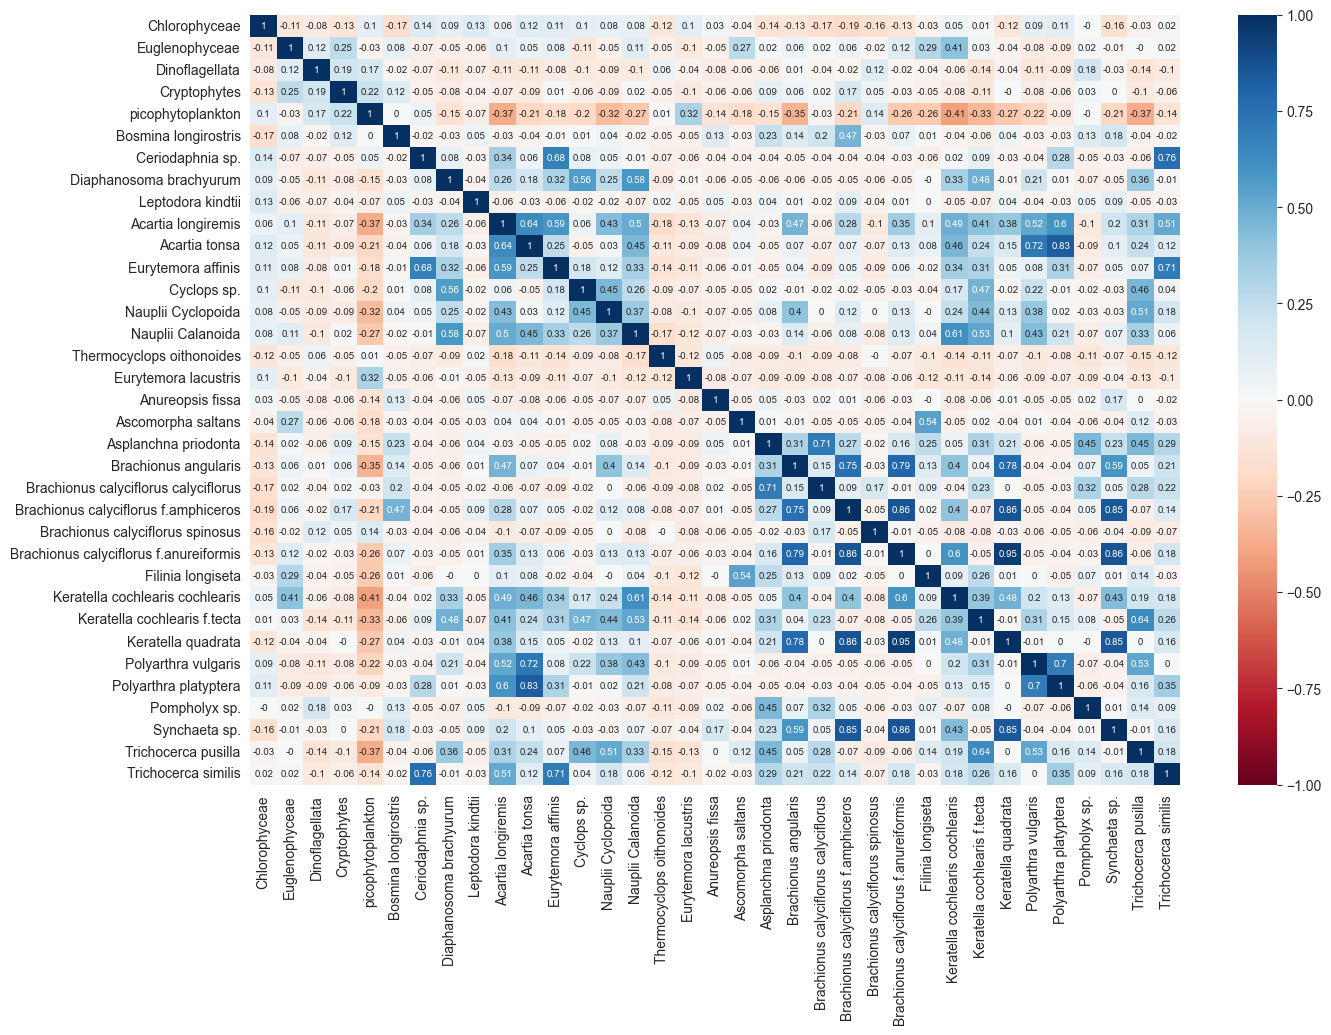

In [122]:
plt.figure(figsize=(15, 10))
correlations = data.corr()
sns.heatmap(round(correlations, 2), cmap='RdBu', annot=True,
            annot_kws={"size": 7}, vmin=-1, vmax=1)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [103.75, 103.75, 142.5, 142.5],
  [85.0, 85.0, 123.125, 123.125],
  [62.5, 62.5, 104.0625, 104.0625],
  [14.375, 14.375, 83.28125, 83.28125],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [190.0, 190.0, 213.75, 213.75],
  [170.0, 170.0, 201.875, 201.875],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [312.5, 312.5, 340.0, 340.0],
  [282.5, 282.5, 326.25, 326.25],


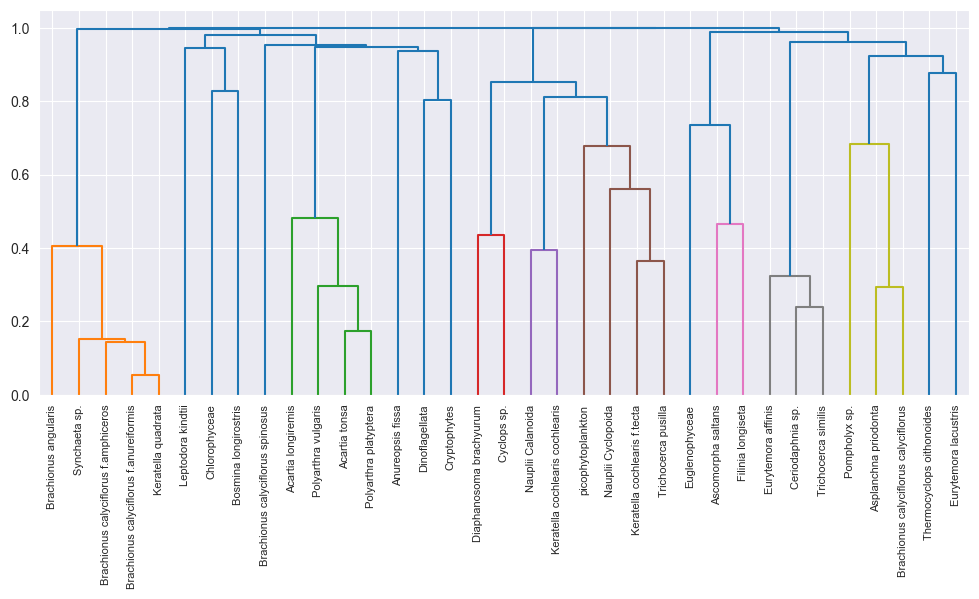

In [123]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12, 5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)

In [124]:
threshold = .980
labels = fcluster(Z, threshold, criterion='distance')
print(labels)

labels_order = np.argsort(labels)

for idx, i in enumerate(data.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(data[i])
    else:
        df_to_append = pd.DataFrame(data[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)


[2 5 3 3 4 2 6 4 2 3 3 6 4 4 4 6 6 3 5 6 1 6 1 3 1 5 4 4 1 3 3 6 1 4 6]


<Axes: >

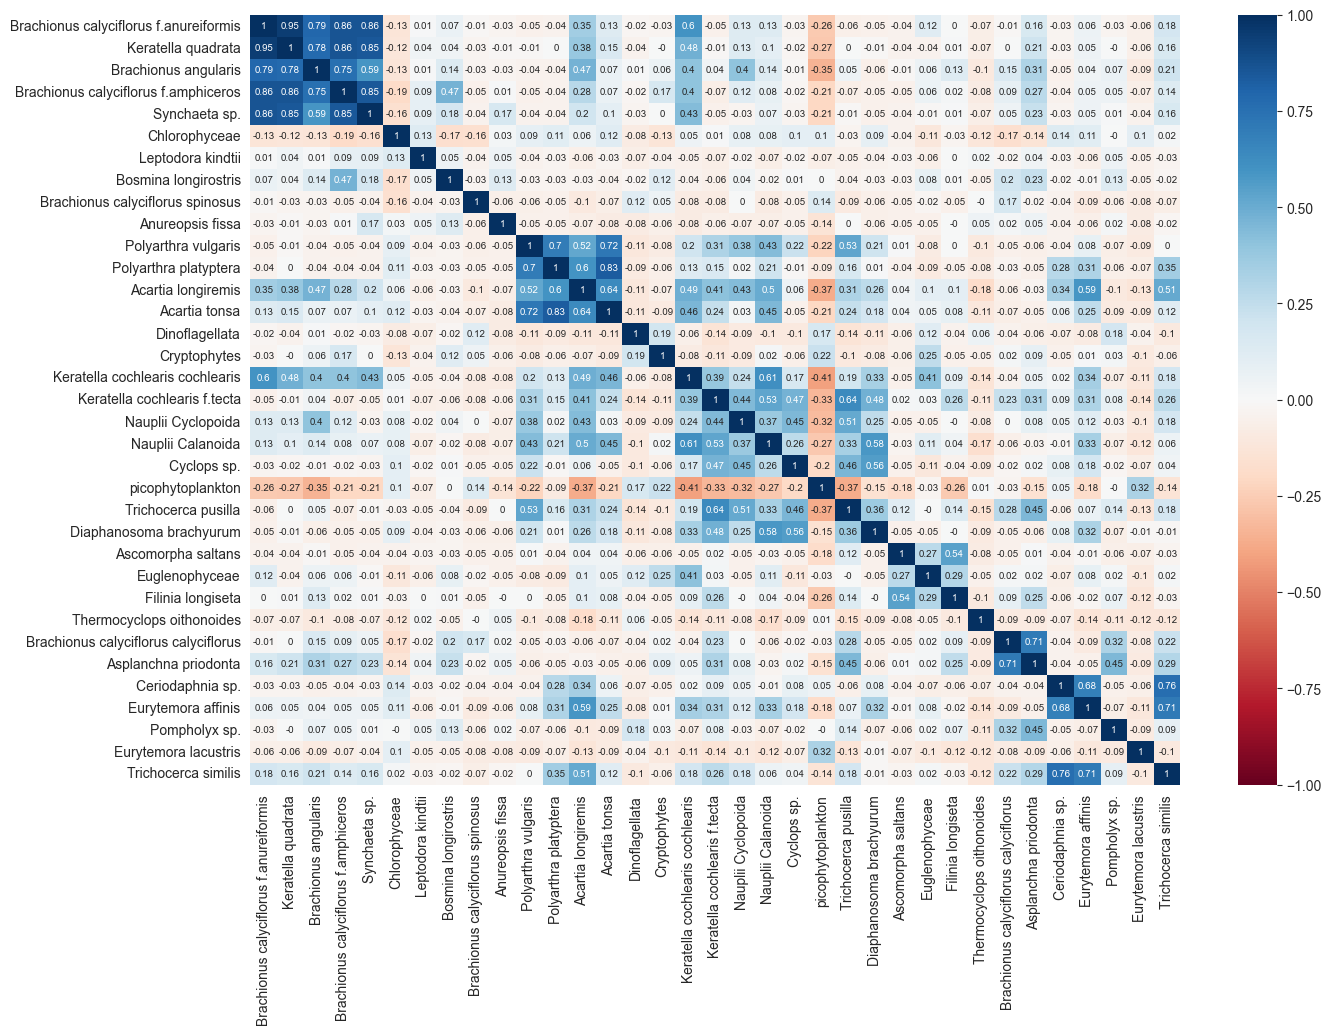

In [125]:
plt.figure(figsize=(15, 10))
correlations = clustered.corr()
sns.heatmap(round(correlations, 2), cmap='RdBu', annot=True,
            annot_kws={"size": 7}, vmin=-1, vmax=1)

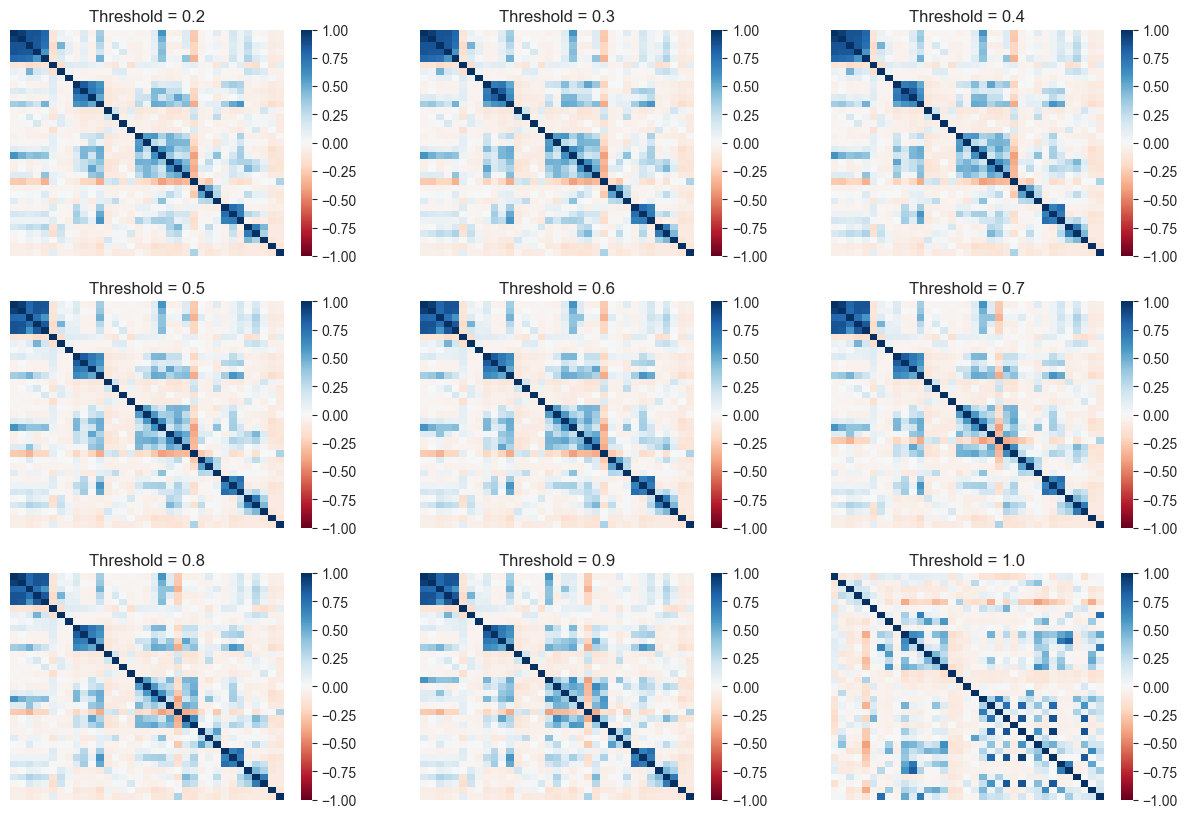

In [126]:
plt.figure(figsize=(15, 10))

for idx, t in enumerate(np.arange(0.2, 1.1, 0.1)):
    plt.subplot(3, 3, idx + 1)
    labels = fcluster(Z, t, criterion='distance')
    labels_order = np.argsort(labels)

    for idx, i in enumerate(data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(data[i])
        else:
            df_to_append = pd.DataFrame(data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)

    correlations = clustered.corr()
    sns.heatmap(round(correlations, 2), cmap='RdBu', vmin=-1, vmax=1,
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t, 2)))

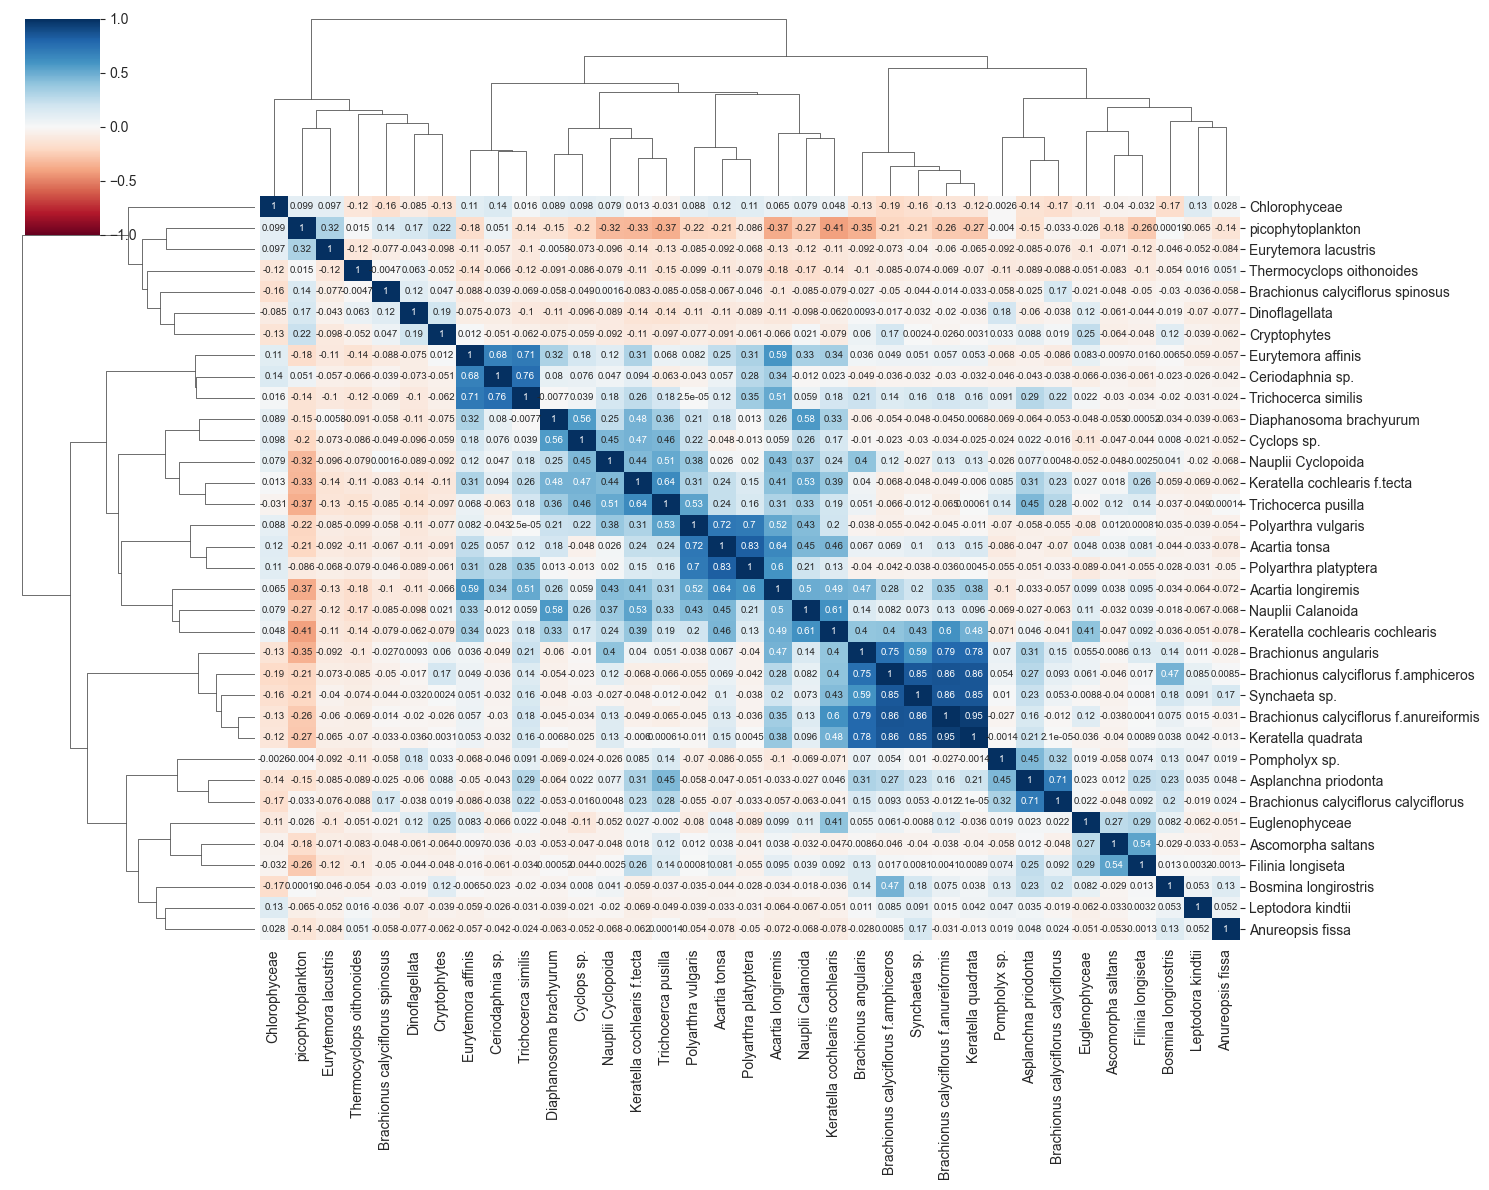

In [127]:
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15, 12))

In [128]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# define the model
model = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
yhat = model.fit(Z)
yhat_2 = model.fit_predict(Z)
# retrieve unique clusters
clusters = unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(Z, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(Z, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(Z, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.4366
Calinski Harabasz Score: 51.5134
Davies Bouldin Score: 0.5910
